In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')
import seaborn as sns

pd.set_option("display.float_format", "{:.2f}".format)
#plt.style.use("seaborn-white")
sns.set_style("white")
plt.rcParams.update({'font.size': 18}) # Set the font size for all element
import warnings
warnings.filterwarnings('ignore')

# Load data and Visulazation

In [3]:
df = pd.read_excel("/content/sample_data/train_Q.xlsx", sheet_name = 'Sheet2')
df.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,57.62,8.47,2.45,4.72,0.73,3.12,1.80
std,15.52,4.13,0.54,1.99,0.19,1.10,1.83
min,20.00,6.00,1.50,2.00,0.33,2.50,0.03
25%,45.00,6.00,2.00,3.00,0.66,2.50,0.33
50%,60.00,6.00,2.00,4.00,0.66,2.50,1.45
75%,70.00,9.00,3.00,6.00,1.00,3.12,2.41
max,85.00,24.00,3.00,8.00,1.00,5.00,8.50


In [4]:
column = ['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']
data = df[column]

In [5]:
data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,57.62,8.47,2.45,4.72,0.73,3.12,1.80
std,15.52,4.13,0.54,1.99,0.19,1.10,1.83
min,20.00,6.00,1.50,2.00,0.33,2.50,0.03
25%,45.00,6.00,2.00,3.00,0.66,2.50,0.33
50%,60.00,6.00,2.00,4.00,0.66,2.50,1.45
75%,70.00,9.00,3.00,6.00,1.00,3.12,2.41
max,85.00,24.00,3.00,8.00,1.00,5.00,8.50


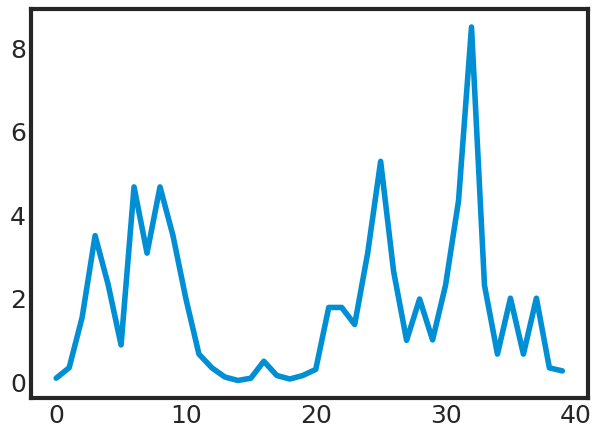

In [6]:
plt.plot(data['Q'])

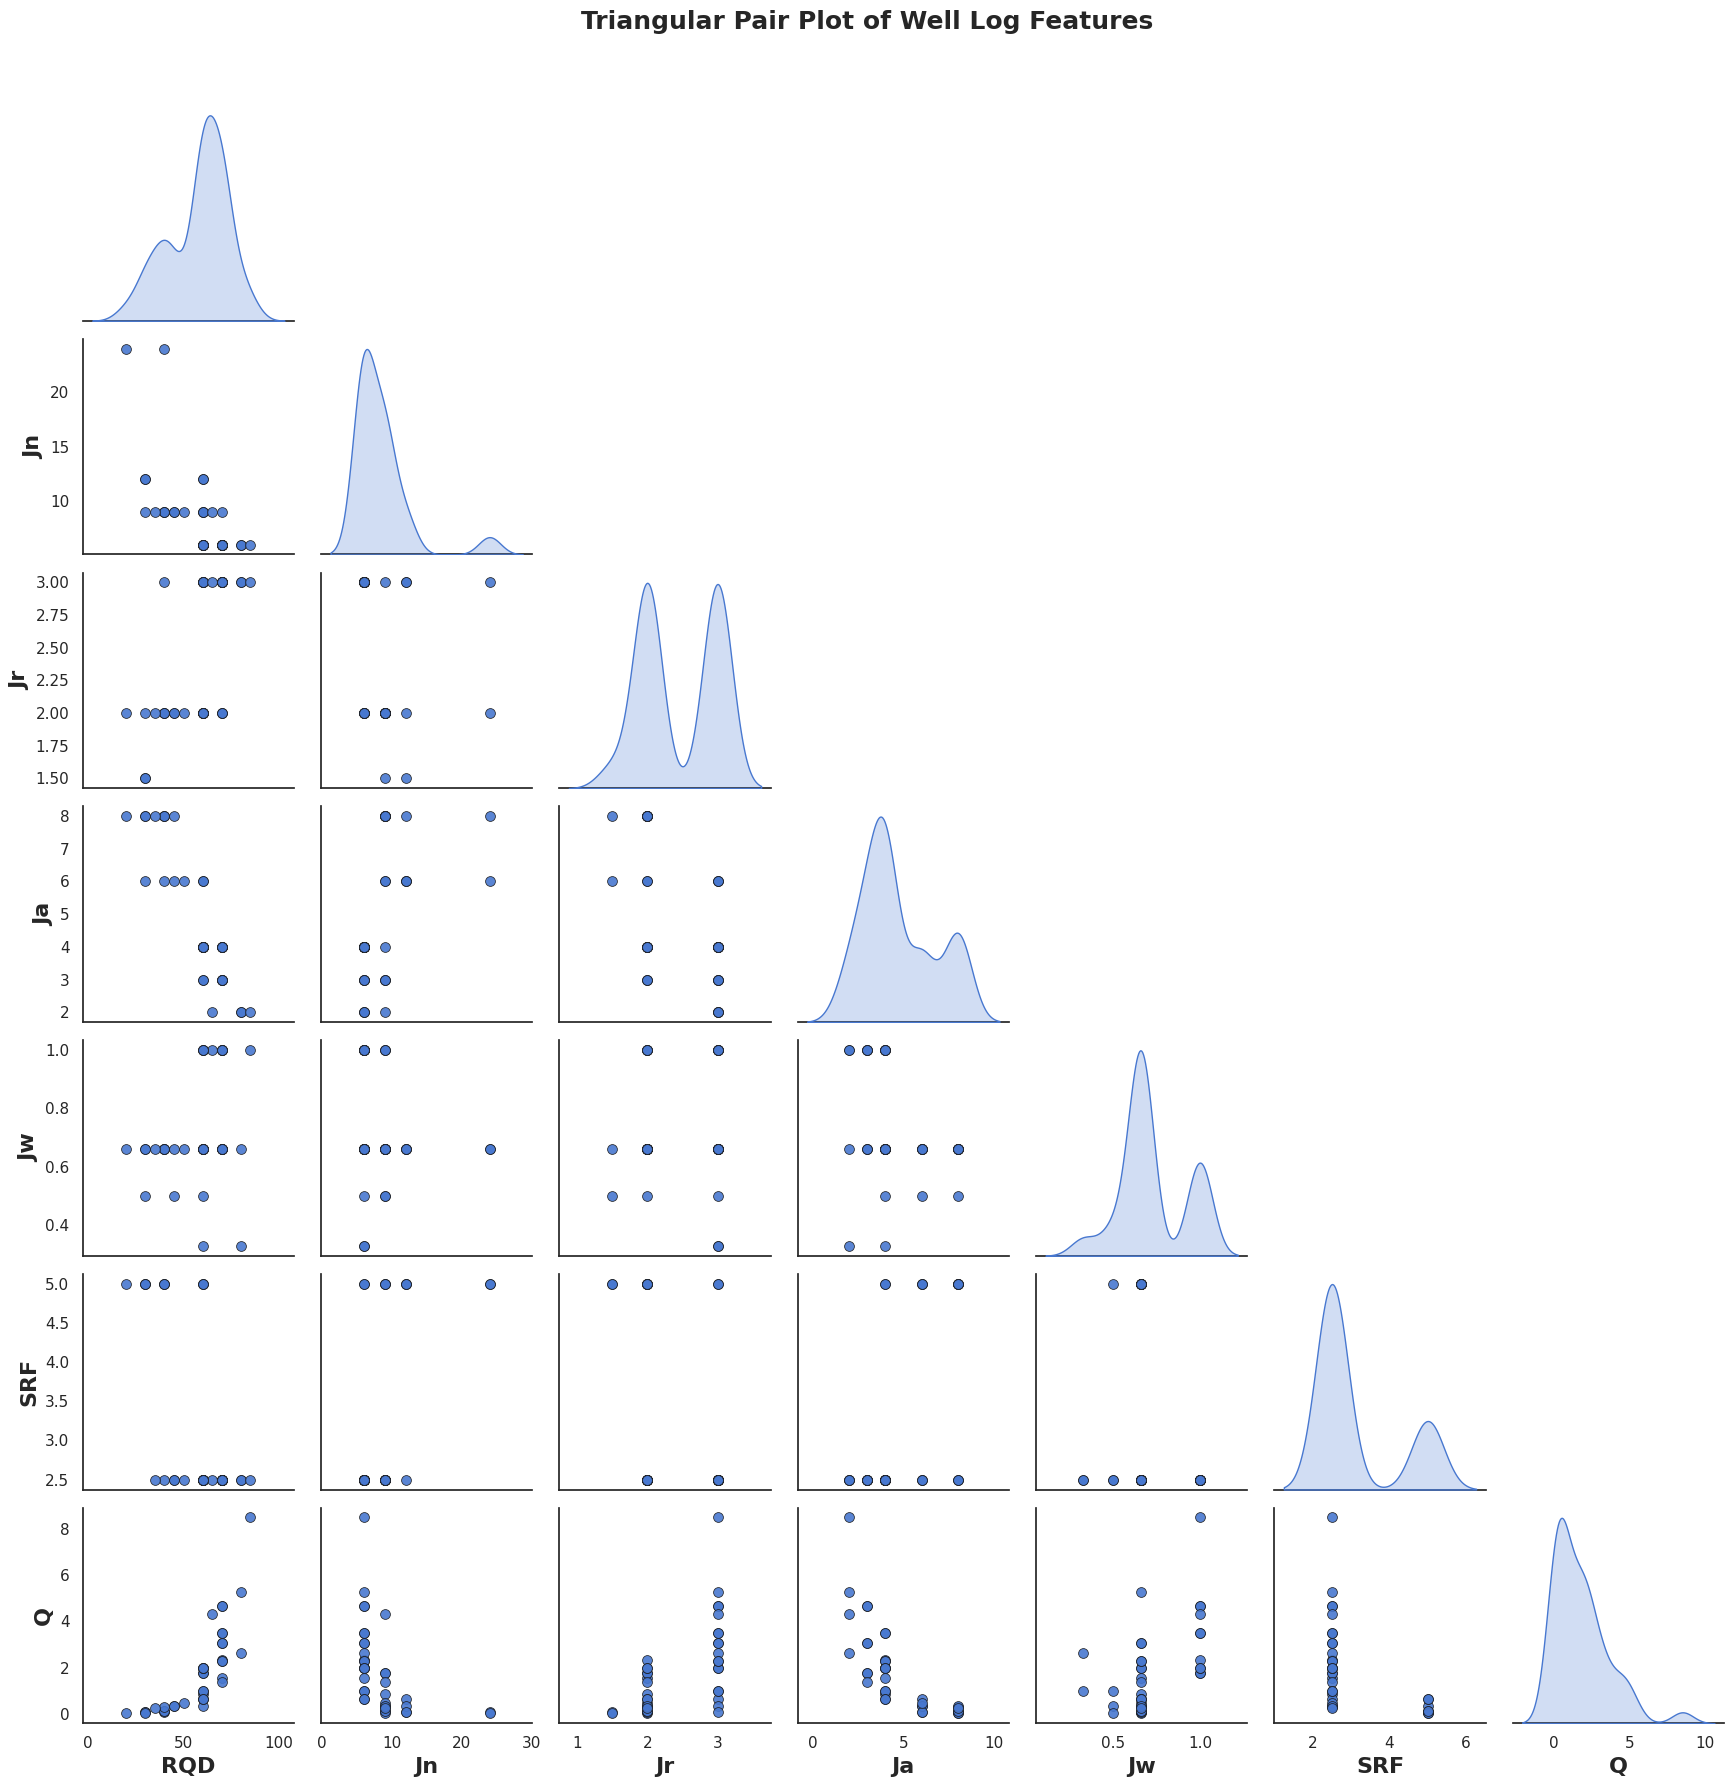

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with the required columns
w = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']]

# Set the fivethirtyeight style with a muted palette
sns.set(style="white", palette="muted")

# Create a triangular pair plot (lower triangle only)
pair_plot = sns.pairplot(
    w,
    diag_kind='kde',  # Kernel density estimate for diagonal
    plot_kws={'alpha': 0.9, 's': 50, 'edgecolor': 'k'},  # Scatter plot settings
    diag_kws={'shade': True, 'bw_adjust': 0.8},  # KDE settings
    markers='o',
    height=2.5,  # Size of the plots
    corner=True  # Only show the lower triangle
)

# Add a title to the entire pair plot
pair_plot.fig.suptitle("Triangular Pair Plot of Well Log Features", fontsize=18, fontweight='bold', y=1.02)

# Adjust the axis label and tick properties for all axes
for ax in pair_plot.axes.flat:
    if ax is not None:
        # Bold and larger font for axis labels
        ax.xaxis.label.set_size(16)
        ax.yaxis.label.set_size(16)
        ax.xaxis.label.set_weight('bold')
        ax.yaxis.label.set_weight('bold')

        # Increase tick label size and make them bold
        #ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
        #ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

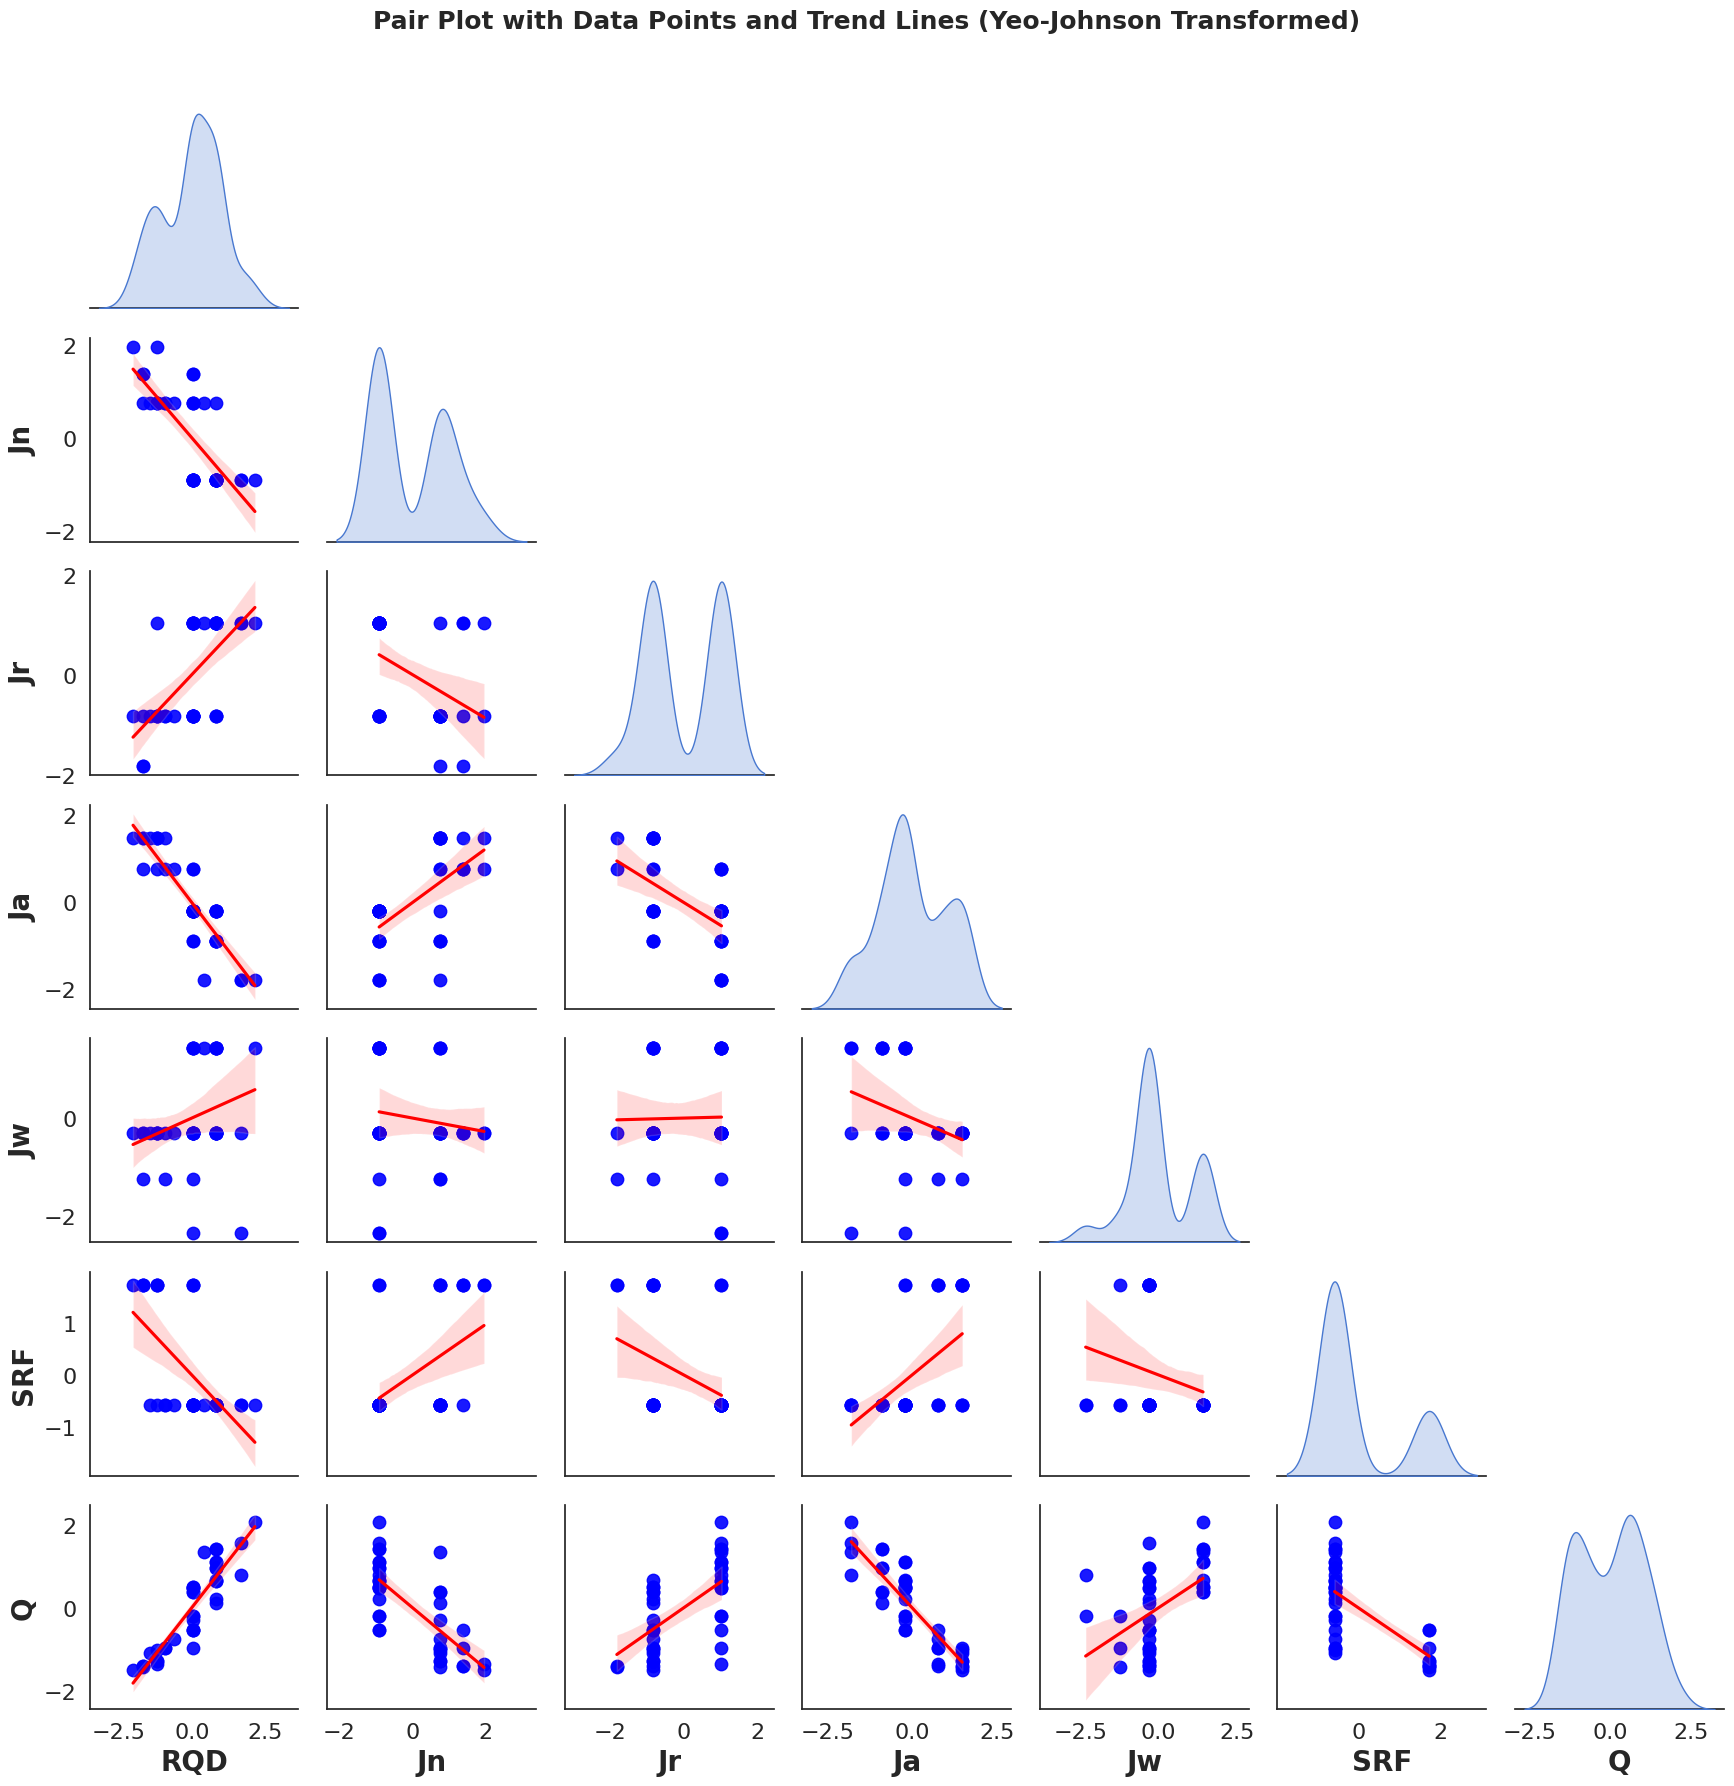

In [8]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Selecting the required columns from well_1_smoothed
w = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']]

# Applying Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')
w_transformed = transformer.fit_transform(w)

# Creating a new DataFrame with transformed data
w_transformed_df = pd.DataFrame(w_transformed, columns=w.columns)

# Set the fivethirtyeight style with a muted palette
sns.set(style="white", palette="muted")

# Create a pair plot with scatter points and trend lines
pair_plot = sns.pairplot(
    w_transformed_df,
    kind='reg',  # Adds linear trend lines
    plot_kws={'scatter_kws': {'s': 80, 'alpha': 0.9, 'color': 'blue'}, 'line_kws': {'color': 'red'}},  # Scatter and trend line settings
    diag_kind='kde',  # Kernel density estimate for diagonal
    diag_kws={'shade': True, 'bw_adjust': 0.8},  # KDE settings
    height=2.5,
    corner=True  # Only lower triangle
)

# Add a title to the entire pair plot
pair_plot.fig.suptitle("Pair Plot with Data Points and Trend Lines (Yeo-Johnson Transformed)",
                       fontsize=18, fontweight='bold', y=1.02)

# Adjust the axis label and tick properties for all axes
for ax in pair_plot.axes.flat:
    if ax is not None:
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)
        ax.xaxis.label.set_weight('bold')
        ax.yaxis.label.set_weight('bold')
        ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Ensemble model traning and Evaluation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dataset (replace 'data' with your actual DataFrame)
X = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]
#X = well_1_smoothed[['RT', 'VSH', 'PHI_eff','GR', 'RHOB']]
y = data['Q']

# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Results
print("Training Set Performance:")
print(f"R²: {r2_train:.4f}, MSE: {mse_train:.4f}")
print("\nTest Set Performance:")
print(f"R²: {r2_test:.4f}, MSE: {mse_test:.4f}")

Training Set Performance:
R²: 0.7308, MSE: 0.9658

Test Set Performance:
R²: 0.6850, MSE: 0.6361


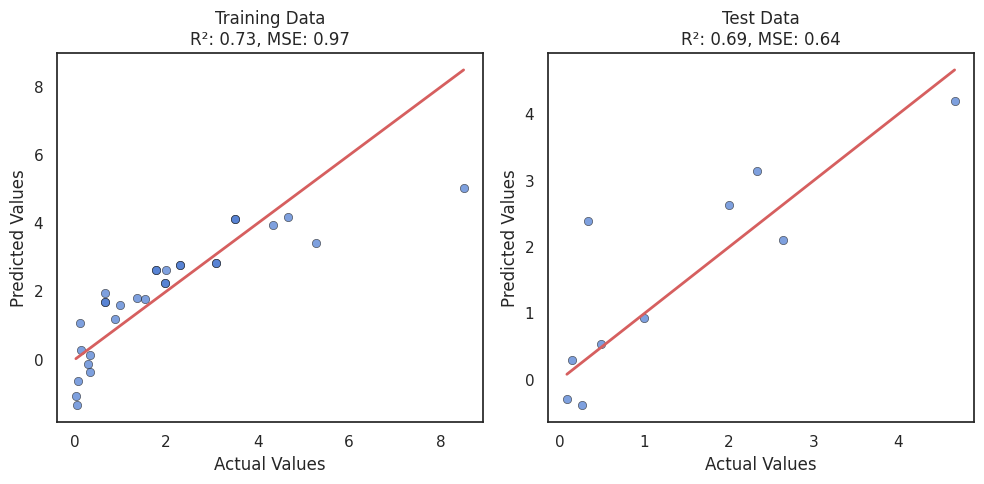

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Train Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7, edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Training Data\nR²: {r2_train:.2f}, MSE: {mse_train:.2f}")

# Test Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test Data\nR²: {r2_test:.2f}, MSE: {mse_test:.2f}")

plt.tight_layout()
plt.show()

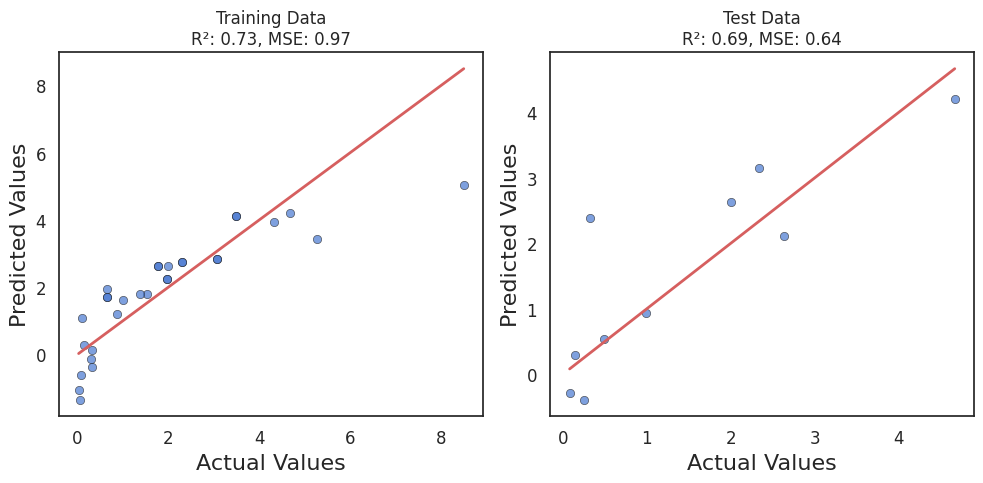

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Train Data
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7, edgecolor='k', ax=axes[0])
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title(f"Training Data\nR²: {r2_train:.2f}, MSE: {mse_train:.2f}")
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].xaxis.label.set_size(16)
axes[0].yaxis.label.set_size(16)

# Test Data
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7, edgecolor='k', ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title(f"Test Data\nR²: {r2_test:.2f}, MSE: {mse_test:.2f}")
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].xaxis.label.set_size(16)
axes[1].yaxis.label.set_size(16)

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Perform 4-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='r2')

# Output the results
print("Cross-Validation R² Scores: ", cv_scores)
print("Mean R² Score: ", np.mean(cv_scores))
print("Standard Deviation of R² Scores: ", np.std(cv_scores))

Cross-Validation R² Scores:  [ 0.58249746 -1.35688491  0.49466511 -1.04196562]
Mean R² Score:  -0.330421989042074
Standard Deviation of R² Scores:  0.8766571592711448


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dataset split
# Dataset (replace 'data' with your actual DataFrame)
X = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]
#X = well_1_smoothed[['RT', 'VSH', 'PHI_eff','GR', 'RHOB']]
y = data['Q']
# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)


# Splitting data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror'),
    'Extra Trees': ExtraTreesRegressor(random_state=42)  # Disable verbose for CatBoost
}

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Model Evaluation
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # Print Results
    print(f"\n{name} - Training Set Performance:")
    print(f"R²: {r2_train:.4f}, MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
    print(f"\n{name} - Test Set Performance:")
    print(f"R²: {r2_test:.4f}, MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")
    print("-" * 50)

Training Random Forest...

Random Forest - Training Set Performance:
R²: 0.9713, MSE: 0.0954, MAE: 0.1597, RMSE: 0.3089

Random Forest - Test Set Performance:
R²: 0.5246, MSE: 1.4555, MAE: 0.5807, RMSE: 1.2064
--------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Training Set Performance:
R²: 0.9999, MSE: 0.0003, MAE: 0.0128, RMSE: 0.0174

Gradient Boosting - Test Set Performance:
R²: 0.7200, MSE: 0.8572, MAE: 0.4065, RMSE: 0.9259
--------------------------------------------------
Training XGBoost...

XGBoost - Training Set Performance:
R²: 1.0000, MSE: 0.0000, MAE: 0.0011, RMSE: 0.0015

XGBoost - Test Set Performance:
R²: 0.8587, MSE: 0.4326, MAE: 0.2804, RMSE: 0.6577
--------------------------------------------------
Training Extra Trees...

Extra Trees - Training Set Performance:
R²: 1.0000, MSE: 0.0000, MAE: 0.0000, RMSE: 0.0000

Extra Trees - Test Set Performance:
R²: 0.7452, MSE: 0.7801, MAE: 0.3282, RMSE: 0.8833
-------------------

In [14]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PowerTransformer
import numpy as np

# K-Fold Cross Validation (4 folds)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate models using cross-validation
for name, model in models.items():
    print(f"\nEvaluating {name} using 4-Fold Cross Validation...\n")

    r2_scores = cross_val_score(model, X_transformed, y, cv=kf, scoring='r2')

    # Print R² score for each fold
    for i, score in enumerate(r2_scores):
        print(f"Fold {i+1}: R² = {score:.4f}")

    # Print mean and standard deviation of R² scores
    print(f"\n{name} - Mean R²: {np.mean(r2_scores):.4f}, Std Dev: {np.std(r2_scores):.4f}")
    print("-" * 50)


Evaluating Random Forest using 4-Fold Cross Validation...

Fold 1: R² = 0.4980
Fold 2: R² = 0.9180
Fold 3: R² = 0.8020
Fold 4: R² = 0.6871

Random Forest - Mean R²: 0.7263, Std Dev: 0.1550
--------------------------------------------------

Evaluating Gradient Boosting using 4-Fold Cross Validation...

Fold 1: R² = 0.7458
Fold 2: R² = 0.8487
Fold 3: R² = 0.8879
Fold 4: R² = 0.8048

Gradient Boosting - Mean R²: 0.8218, Std Dev: 0.0528
--------------------------------------------------

Evaluating XGBoost using 4-Fold Cross Validation...

Fold 1: R² = 0.6217
Fold 2: R² = 0.6445
Fold 3: R² = 0.8072
Fold 4: R² = 0.7764

XGBoost - Mean R²: 0.7125, Std Dev: 0.0805
--------------------------------------------------

Evaluating Extra Trees using 4-Fold Cross Validation...

Fold 1: R² = 0.6395
Fold 2: R² = 0.8975
Fold 3: R² = 0.8733
Fold 4: R² = 0.7312

Extra Trees - Mean R²: 0.7854, Std Dev: 0.1055
--------------------------------------------------


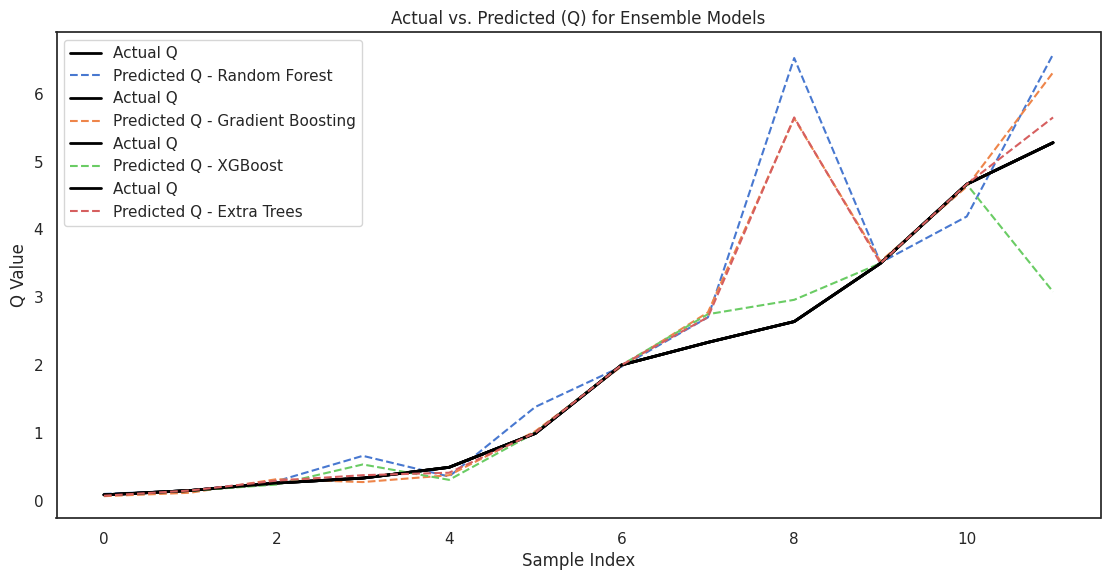

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Sort actual values for a better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

for name, model in models.items():
    y_pred_test = model.predict(X_test)
    y_pred_sorted = np.array(y_pred_test)[sorted_indices]  # Sort predictions accordingly
    plt.plot(y_test_sorted, label="Actual Q", color="black", linewidth=2)
    plt.plot(y_pred_sorted, label=f"Predicted Q - {name}", linestyle="--")

plt.xlabel("Sample Index")
plt.ylabel("Q Value")
plt.title("Actual vs. Predicted (Q) for Ensemble Models")
plt.legend()
plt.show()

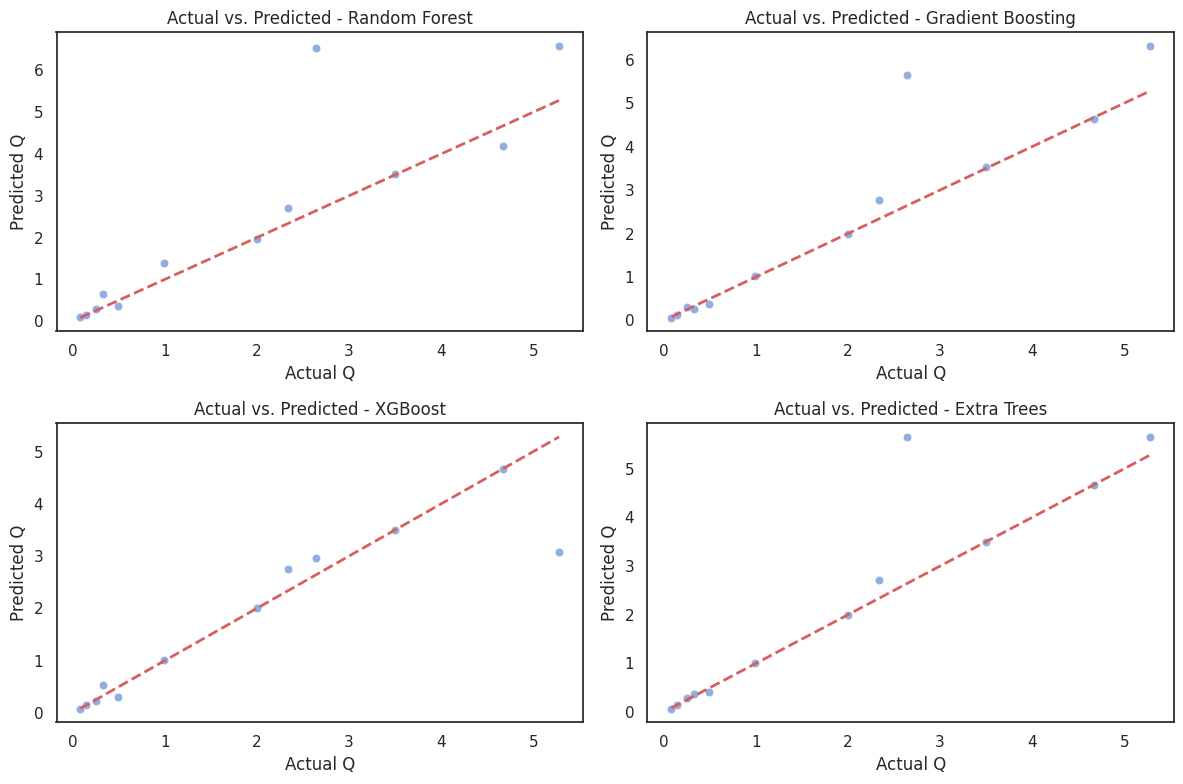

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred_test = model.predict(X_test)

    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Q")
    plt.ylabel("Predicted Q")
    plt.title(f"Actual vs. Predicted - {name}")

plt.tight_layout()
plt.show()

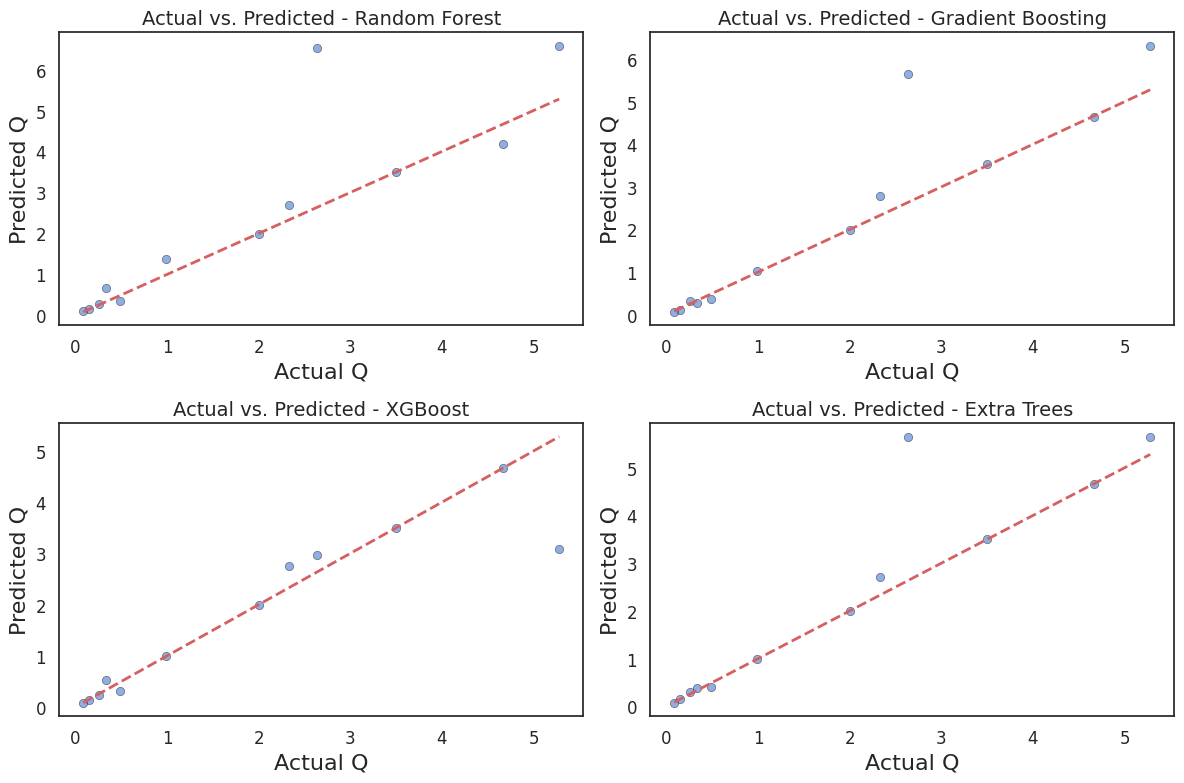

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred_test = model.predict(X_test)

    ax = plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, edgecolor='k', ax=ax)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line

    ax.set_xlabel("Actual Q", fontsize=16)
    ax.set_ylabel("Predicted Q", fontsize=16)
    ax.set_title(f"Actual vs. Predicted - {name}", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

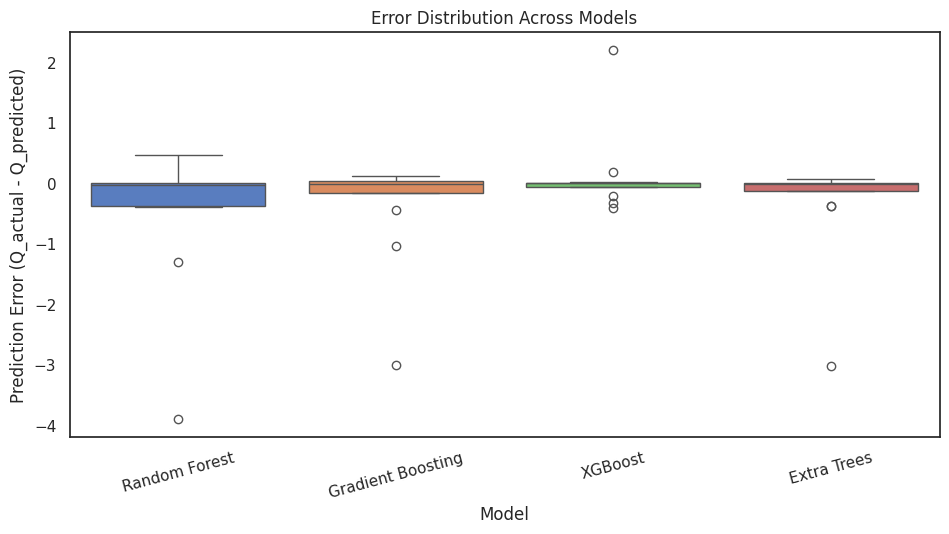

In [18]:
errors = {name: y_test - model.predict(X_test) for name, model in models.items()}

plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(errors))
plt.xlabel("Model")
plt.ylabel("Prediction Error (Q_actual - Q_predicted)")
plt.title("Error Distribution Across Models")
plt.xticks(rotation=15)
plt.show()

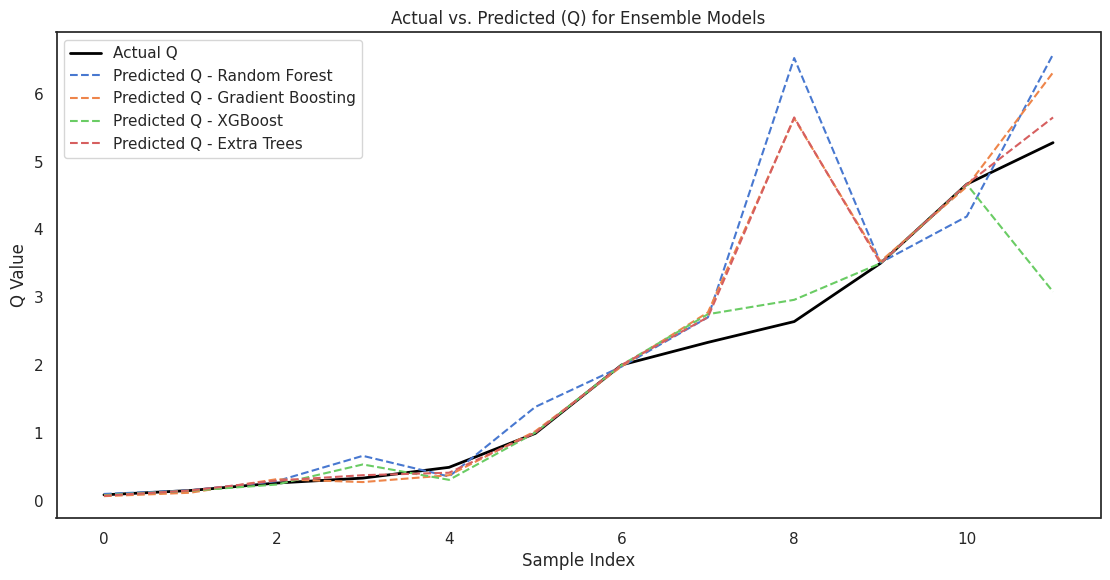

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Sort actual values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

plt.plot(y_test_sorted, label="Actual Q", color="black", linewidth=2)  # Actual values

# Plot predicted values for each model
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    y_pred_sorted = np.array(y_pred_test)[sorted_indices]  # Sort predictions accordingly
    plt.plot(y_pred_sorted, linestyle="--", label=f"Predicted Q - {name}")

plt.xlabel("Sample Index")
plt.ylabel("Q Value")
plt.title("Actual vs. Predicted (Q) for Ensemble Models")
plt.legend()
plt.show()

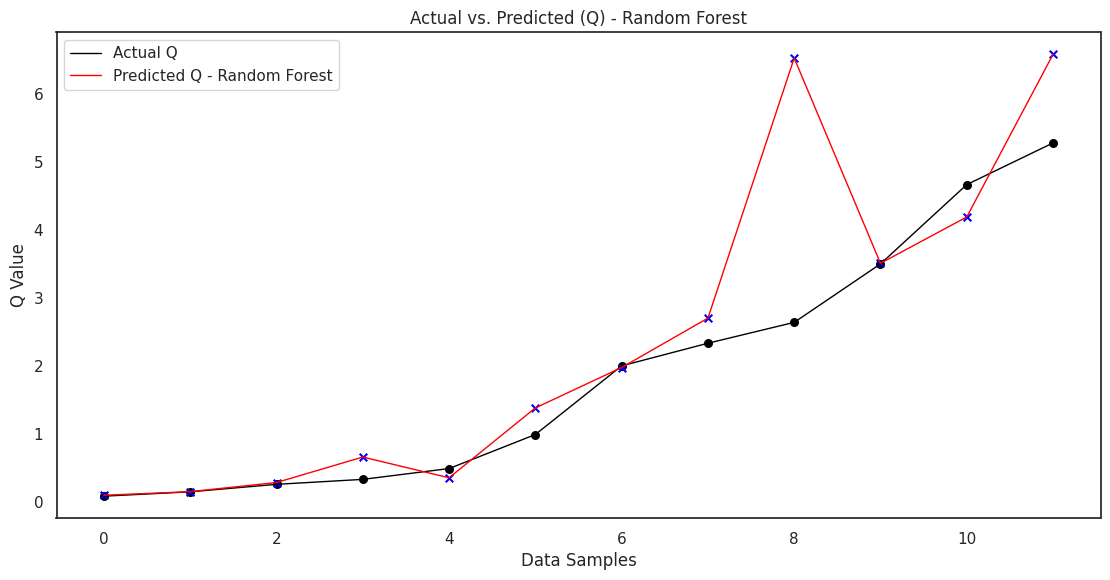

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sort actual values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

# Get predictions from Random Forest and sort them accordingly
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)
y_pred_sorted = np.array(y_pred_rf)[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Q", color="black", linestyle="-", linewidth=1)  # Thin line for actual values
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color="black", marker='o', s=30)  # Dots for actual values

plt.plot(y_pred_sorted, label="Predicted Q - Random Forest", color="red", linestyle="-", linewidth=1)  # Thin line for predictions
plt.scatter(range(len(y_pred_sorted)), y_pred_sorted, color="blue", marker='x', s=30)  # Dots for predicted values

plt.xlabel("Data Samples")
plt.ylabel("Q Value")
plt.title("Actual vs. Predicted (Q) - Random Forest")
plt.legend()
plt.show()

# Data generation as Blind dataset

In [21]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

# Columns to consider
columns = ['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF', 'Q']
data = df[columns]

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust components based on data complexity
gmm.fit(data)

# Generate synthetic samples (500 samples)
synthetic_data, _ = gmm.sample(500)

# Create a DataFrame
blind_data = pd.DataFrame(synthetic_data, columns=columns)

# Ensure no negative values (if your data shouldn't have any)
blind_data = blind_data.apply(lambda x: np.maximum(x, 0))

blind_data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,57.24,8.35,2.42,4.73,0.72,3.15,1.77
std,15.35,4.25,0.52,1.99,0.18,1.06,1.70
min,10.31,0.00,1.27,0.93,0.21,0.69,0.00
25%,44.35,5.87,2.04,3.25,0.61,2.41,0.24
50%,62.29,7.35,2.40,4.13,0.70,3.00,1.35
75%,68.77,9.21,2.74,6.32,0.83,3.78,2.89
max,87.09,35.88,4.30,9.58,1.32,6.35,7.00


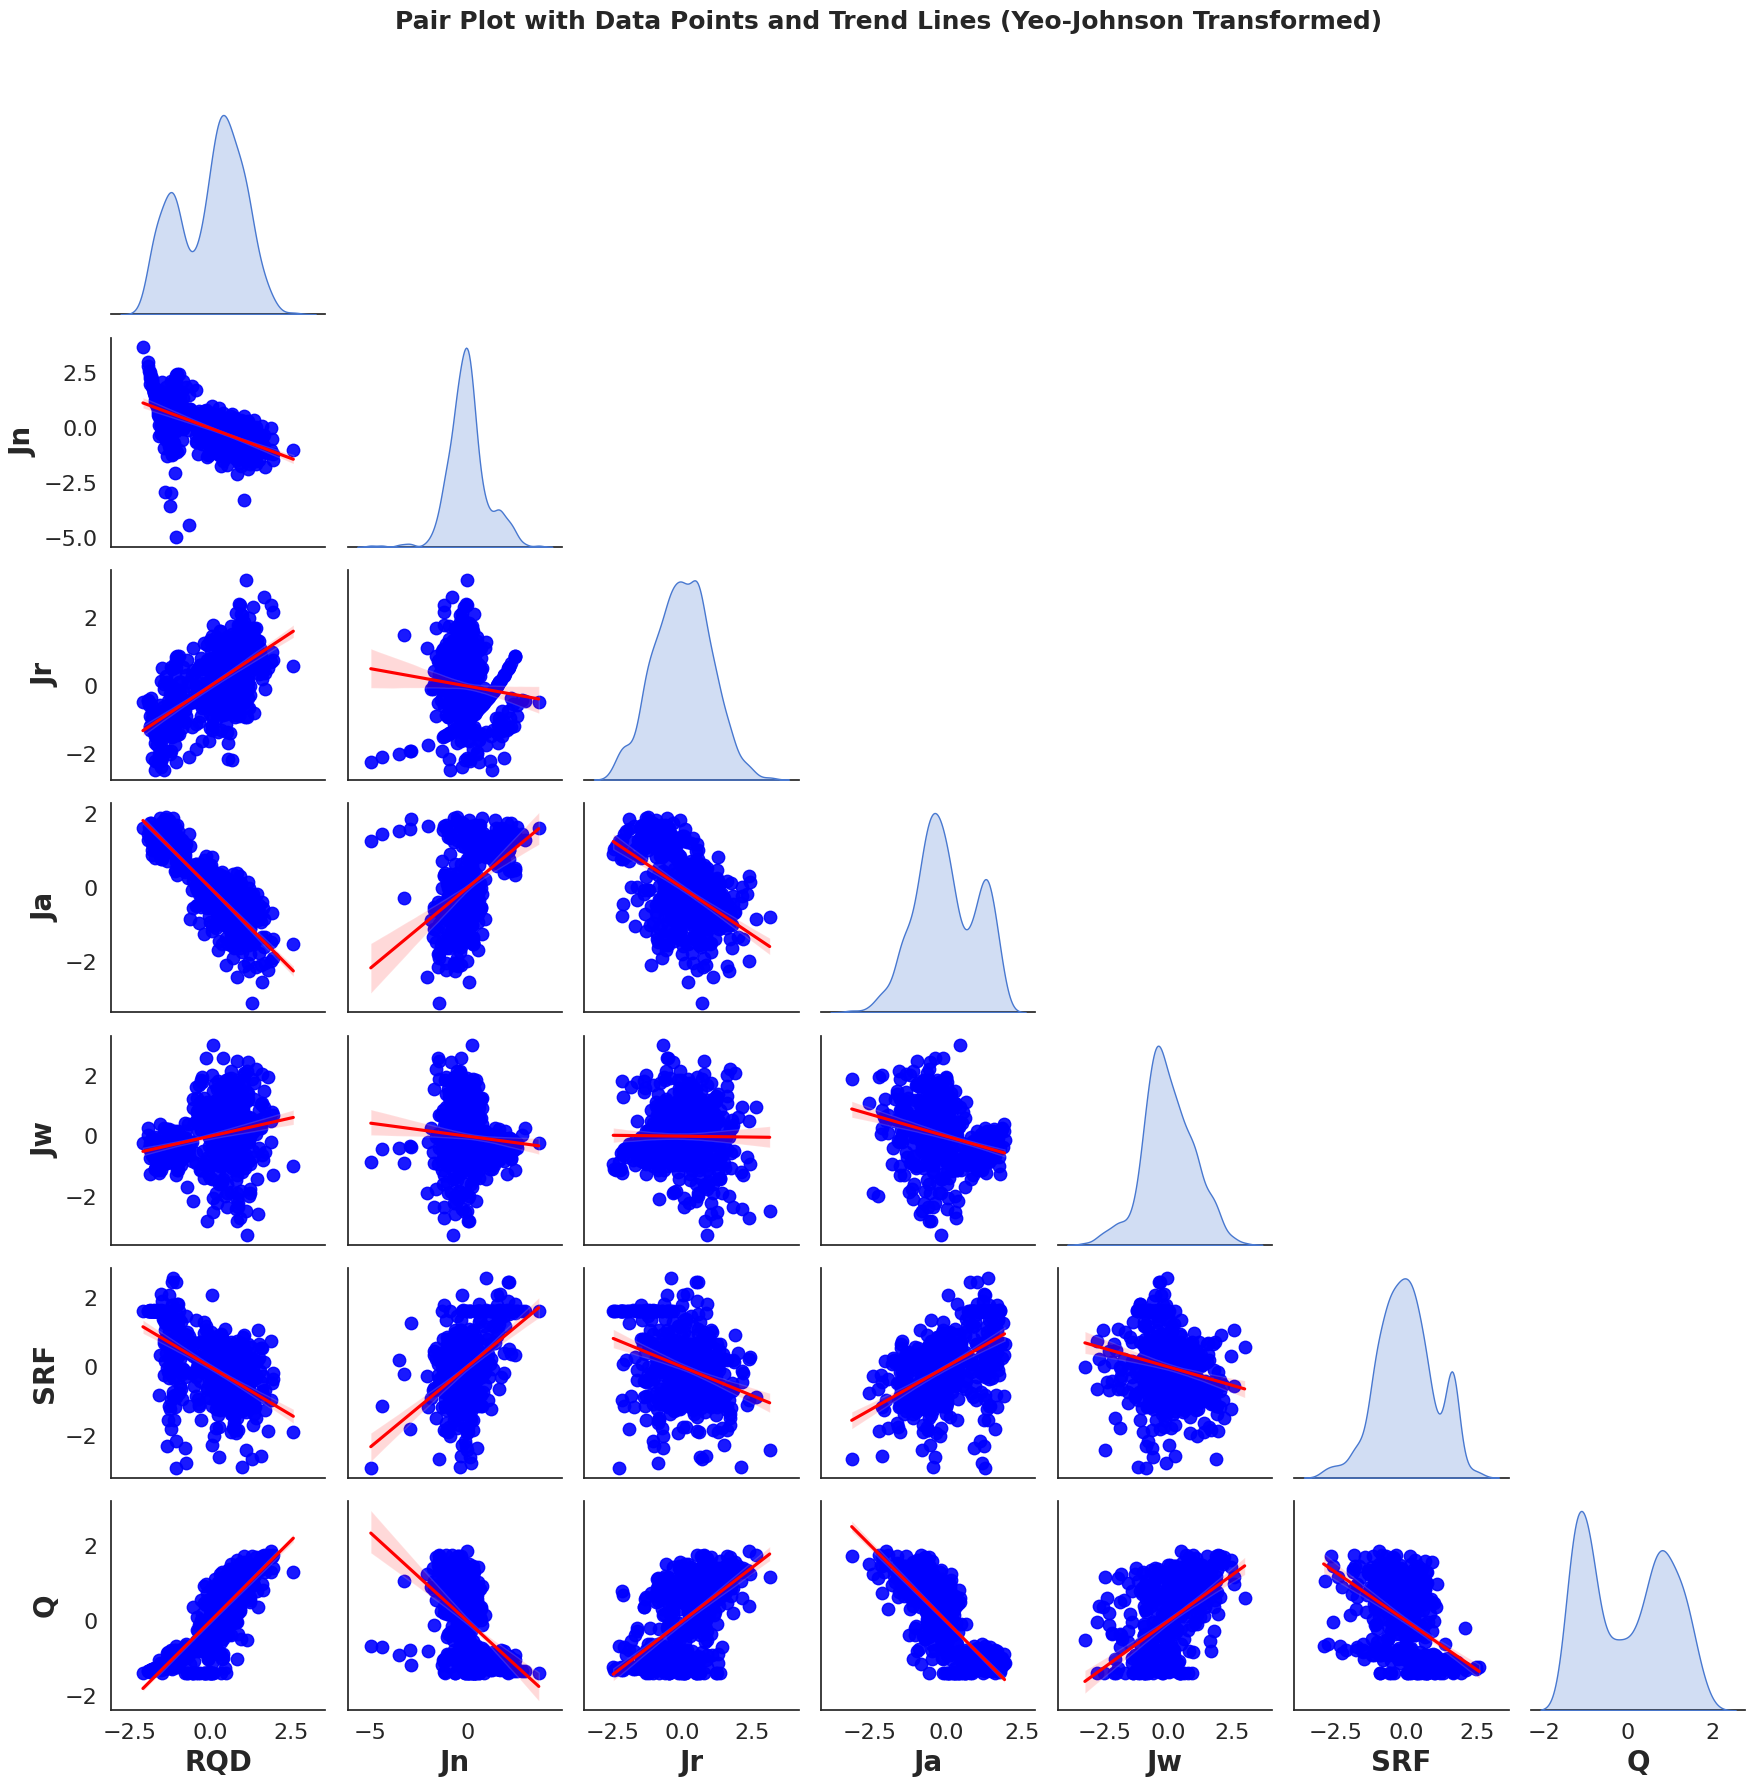

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting the required columns from well_1_smoothed
w = blind_data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']]

# Applying Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')
w_transformed = transformer.fit_transform(w)

# Creating a new DataFrame with transformed data
w_transformed_df = pd.DataFrame(w_transformed, columns=w.columns)

# Set the fivethirtyeight style with a muted palette
sns.set(style="white", palette="muted")

# Create a pair plot with scatter points and trend lines
pair_plot = sns.pairplot(
    w_transformed_df,
    kind='reg',  # Adds linear trend lines
    plot_kws={'scatter_kws': {'s': 80, 'alpha': 0.9, 'color': 'blue'}, 'line_kws': {'color': 'red'}},  # Scatter and trend line settings
    diag_kind='kde',  # Kernel density estimate for diagonal
    diag_kws={'shade': True, 'bw_adjust': 0.8},  # KDE settings
    height=2.5,
    corner=True  # Only lower triangle
)

# Add a title to the entire pair plot
pair_plot.fig.suptitle("Pair Plot with Data Points and Trend Lines (Yeo-Johnson Transformed)",
                       fontsize=18, fontweight='bold', y=1.02)

# Adjust the axis label and tick properties for all axes
for ax in pair_plot.axes.flat:
    if ax is not None:
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)
        ax.xaxis.label.set_weight('bold')
        ax.yaxis.label.set_weight('bold')
        ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Ensure well2 exists
# Assuming X_well2 is your input DataFrame for prediction
X_well2 = blind_data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]

# Initialize a dictionary to store predictions
predictions = {}

# Apply the same Yeo-Johnson transformation used for training
transformer = PowerTransformer(method='yeo-johnson') # Initialize the transformer
X_well2_transformed = transformer.fit_transform(X_well2) # Transform X_well2

# Loop through all trained models and predict
for name, model in models.items():
    print(f"Predicting with {name}...")

    # Predict on the transformed blind dataset
    y_pred_well2 = model.predict(X_well2_transformed)

    # Inverse transform if necessary (adjust based on your y transformation)
    y_pred_well2_inv = y_pred_well2  # Use inverse_transform() if needed

    # Clip negative predictions if necessary
    y_pred_well2_inv = np.maximum(y_pred_well2_inv, 0)

    # Store predictions in the DataFrame
    blind_data[f'Q_predicted_{name.replace(" ", "_")}'] = y_pred_well2_inv

# Display the first few rows with predictions
blind_data.describe()

Predicting with Random Forest...
Predicting with Gradient Boosting...
Predicting with XGBoost...
Predicting with Extra Trees...


,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,57.24,8.35,2.42,4.73,0.72,3.15,1.77,1.90,1.86,1.36,1.89
std,15.35,4.25,0.52,1.99,0.18,1.06,1.70,1.60,1.71,0.99,1.54
min,10.31,0.00,1.27,0.93,0.21,0.69,0.00,0.07,0.00,0.06,0.06
25%,44.35,5.87,2.04,3.25,0.61,2.41,0.24,0.35,0.32,0.49,0.42
50%,62.29,7.35,2.40,4.13,0.70,3.00,1.35,1.72,1.49,1.43,1.67
75%,68.77,9.21,2.74,6.32,0.83,3.78,2.89,2.74,2.84,1.54,2.78
max,87.09,35.88,4.30,9.58,1.32,6.35,7.00,7.10,8.51,6.82,7.17


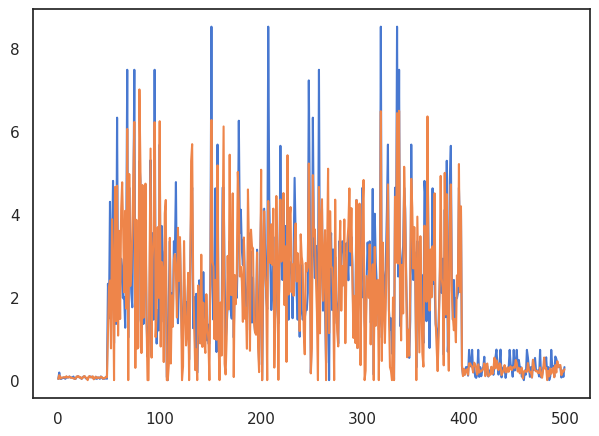

In [24]:
plt.plot(blind_data['Q_predicted_Gradient_Boosting'].values)
plt.plot(blind_data['Q'].values)

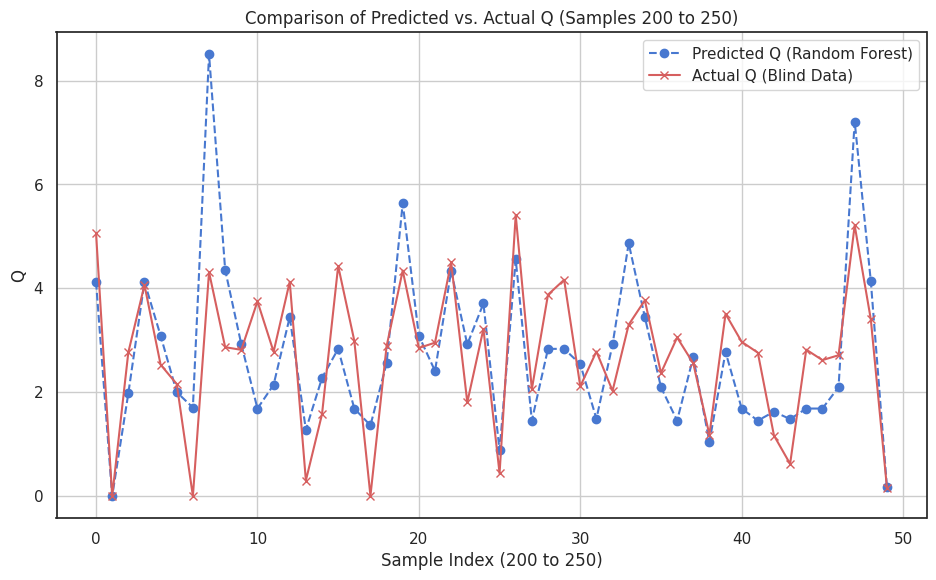

In [25]:
import matplotlib.pyplot as plt

# Plotting samples from index 200 to 250
plt.figure(figsize=(10, 6))
plt.plot(blind_data['Q_predicted_Gradient_Boosting'].values[200:250], label='Predicted Q (Random Forest)', color='b', linestyle='--', marker='o')
plt.plot(blind_data['Q'].values[200:250], label='Actual Q (Blind Data)', color='r', linestyle='-', marker='x')

plt.xlabel('Sample Index (200 to 250)')
plt.ylabel('Q')
plt.title('Comparison of Predicted vs. Actual Q (Samples 200 to 250)')
plt.legend()
plt.grid(True)
plt.show()

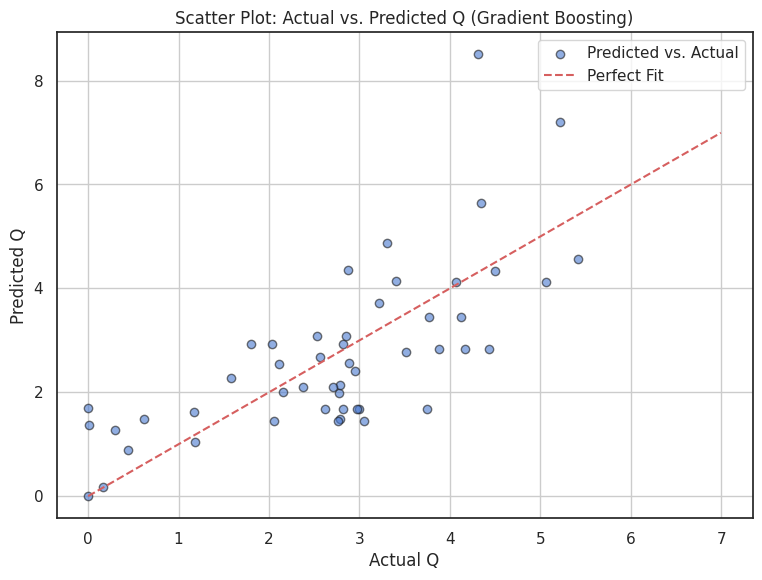

In [26]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs. Predicted Q values
plt.figure(figsize=(8, 6))
plt.scatter(blind_data['Q'].values[200:250],
            blind_data['Q_predicted_Gradient_Boosting'].values[200:250],
            color='b', alpha=0.6, edgecolors='k', label='Predicted vs. Actual')

# Reference Line (Ideal Prediction Line)
plt.plot([blind_data['Q'].min(), blind_data['Q'].max()],
         [blind_data['Q'].min(), blind_data['Q'].max()],
         color='r', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Q')
plt.ylabel('Predicted Q')
plt.title('Scatter Plot: Actual vs. Predicted Q (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()


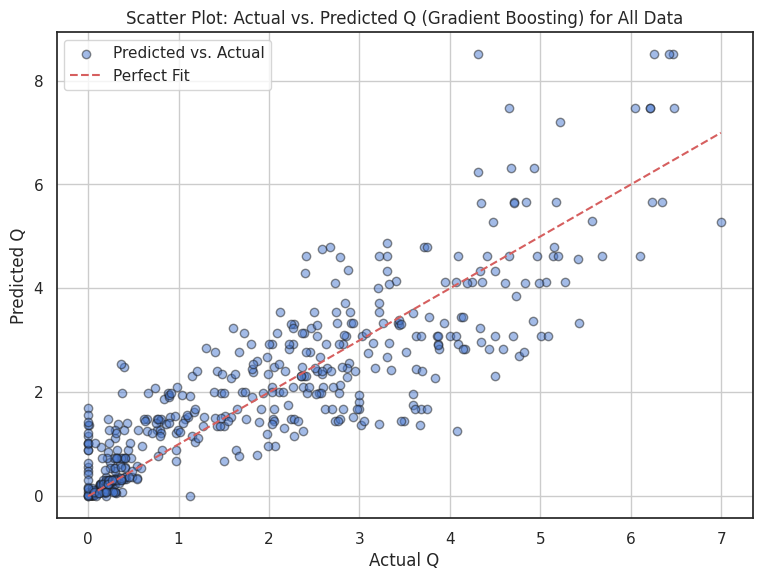

In [27]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs. Predicted Q values (Entire Dataset)
plt.figure(figsize=(8, 6))
plt.scatter(blind_data['Q'],
            blind_data['Q_predicted_Gradient_Boosting'],
            color='b', alpha=0.5, edgecolors='k', label='Predicted vs. Actual')

# Reference Line (Perfect Fit)
plt.plot([blind_data['Q'].min(), blind_data['Q'].max()],
         [blind_data['Q'].min(), blind_data['Q'].max()],
         color='r', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Q')
plt.ylabel('Predicted Q')
plt.title('Scatter Plot: Actual vs. Predicted Q (Gradient Boosting) for All Data')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
data

,RQD,Jn,Jr,Ja,Jw,SRF,Q
0,30,12,1.50,6,0.66,5.00,0.08
1,45,9,2.00,6,0.50,2.50,0.33
2,70,6,2.00,4,0.66,2.50,1.54
3,70,6,3.00,4,1.00,2.50,3.50
4,70,6,2.00,4,1.00,2.50,2.33
5,60,9,2.00,4,0.66,2.50,0.88
6,70,6,3.00,3,1.00,2.50,4.67
7,70,6,3.00,3,0.66,2.50,3.08
8,70,6,3.00,3,1.00,2.50,4.67
9,70,6,3.00,4,1.00,2.50,3.50


Training Set Performance:
R²: 0.7390, MSE: 0.8689

Test Set Performance:
R²: 0.6402, MSE: 1.1017

Linear Regression Equation:
Q = -6.9116 + (0.0416 * RQD) + (-0.0432 * Jn) + (1.0654 * Jr) + (-0.0116 * Ja) + (5.0006 * Jw) + (0.1616 * SRF)


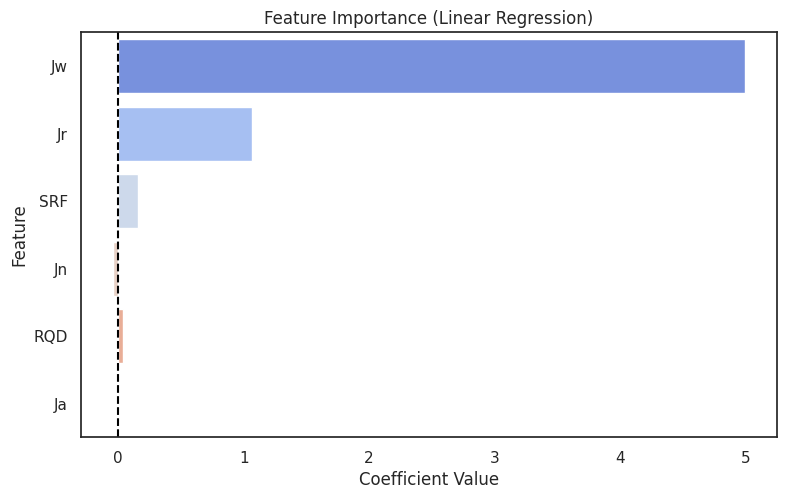

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dataset (replace 'data' with your actual DataFrame)
X = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]

y = data['Q']

# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Results
print("Training Set Performance:")
print(f"R²: {r2_train:.4f}, MSE: {mse_train:.4f}")
print("\nTest Set Performance:")
print(f"R²: {r2_test:.4f}, MSE: {mse_test:.4f}")

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Printing the equation
equation = f"Q = {intercept:.4f}"
for i, col in enumerate(X.columns):
    equation += f" + ({coefficients[i]:.4f} * {col})"
print("\nLinear Regression Equation:")
print(equation)

# Feature Importance Plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression)")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

Nonlinear Regression Performance:
R²: 0.7806, MSE: 0.7134

Derived Nonlinear Equation:
Q = 0.7056 * RQD^4.4394 + -0.0496 * Jn^1.1228 + 0.1375 * Jr^0.6833 + -0.0039 * exp(Ja) + -0.0971 * Jw * SRF


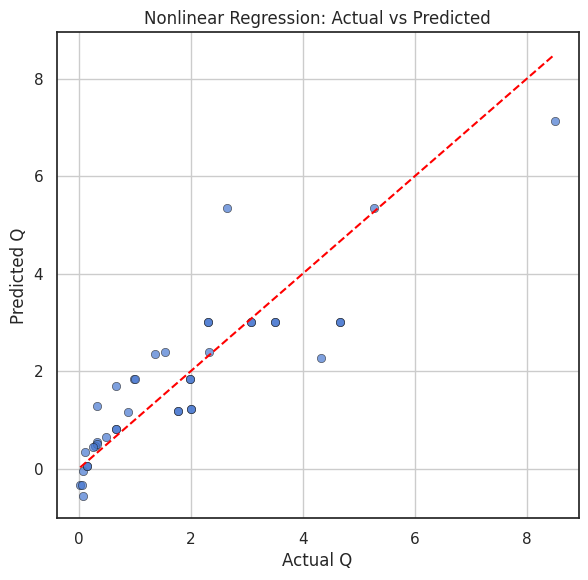

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load Data
X = data[['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF']]
y = data['Q']

# Normalize X and y
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Define the nonlinear model
def nonlinear_Q(X, a, b, c, d, e, f, g, h):
    RQD, Jn, Jr, Ja, Jw, SRF = X.T  # Ensure correct feature unpacking
    return a * RQD**b + c * Jn**d + e * Jr**f + g * np.exp(Ja) + h * Jw * SRF

# Initial guesses for parameters
initial_guesses = np.ones(8)

# Curve fitting
params, covariance = curve_fit(nonlinear_Q, X_scaled, y_scaled, p0=initial_guesses, maxfev=20000)

# Predictions
y_pred_scaled = nonlinear_Q(X_scaled, *params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Model Evaluation
r2_score_value = r2_score(y, y_pred)
mse_value = mean_squared_error(y, y_pred)

print(f"Nonlinear Regression Performance:\nR²: {r2_score_value:.4f}, MSE: {mse_value:.4f}")

# Derived Equation
equation = f"Q = {params[0]:.4f} * RQD^{params[1]:.4f} + {params[2]:.4f} * Jn^{params[3]:.4f} + " \
           f"{params[4]:.4f} * Jr^{params[5]:.4f} + {params[6]:.4f} * exp(Ja) + {params[7]:.4f} * Jw * SRF"
print("\nDerived Nonlinear Equation:")
print(equation)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--")
plt.xlabel("Actual Q")
plt.ylabel("Predicted Q")
plt.title("Nonlinear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

Top 3 Features Selected: ['RQD', 'Ja', 'Jw']

Nonlinear Regression Performance:
R²: 0.8903, MSE: 0.3567

Derived Nonlinear Equation:
Q = 0.6157 * RQD^4.8625 + -0.1584 * Ja^0.4541 + 0.1420 * exp(Jw) + -0.0628


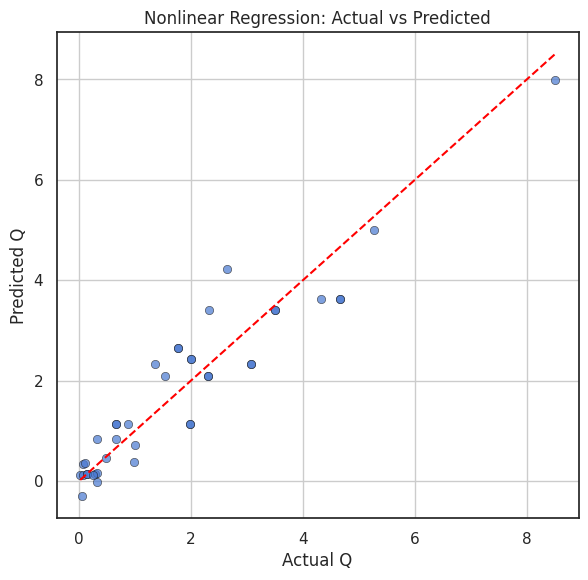

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load Data
X = data[['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF']]
y = data['Q']

# Step 1: Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(3).index.tolist()
print("Top 3 Features Selected:", top_features)

# Select the top 3 features
X_selected = data[top_features]

# Step 2: Normalize X and y
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_selected)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 3: Define the Nonlinear Model
def nonlinear_Q(X, a, b, c, d, e, f):
    F1, F2, F3 = X.T  # Ensure correct feature unpacking
    return a * F1**b + c * F2**d + e * np.exp(F3) + f

# Step 4: Curve Fitting
initial_guesses = np.ones(6)  # Initial parameter guesses
params, covariance = curve_fit(nonlinear_Q, X_scaled, y_scaled, p0=initial_guesses, maxfev=20000)

# Step 5: Predictions
y_pred_scaled = nonlinear_Q(X_scaled, *params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 6: Model Evaluation
r2_score_value = r2_score(y, y_pred)
mse_value = mean_squared_error(y, y_pred)

print(f"\nNonlinear Regression Performance:\nR²: {r2_score_value:.4f}, MSE: {mse_value:.4f}")

# Step 7: Derived Nonlinear Equation
equation = f"Q = {params[0]:.4f} * {top_features[0]}^{params[1]:.4f} + {params[2]:.4f} * {top_features[1]}^{params[3]:.4f} + " \
           f"{params[4]:.4f} * exp({top_features[2]}) + {params[5]:.4f}"
print("\nDerived Nonlinear Equation:")
print(equation)

# Step 8: Scatter Plot - Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--")
plt.xlabel("Actual Q")
plt.ylabel("Predicted Q")
plt.title("Nonlinear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

Top 3 Features Selected: ['RQD', 'Ja', 'Jw']


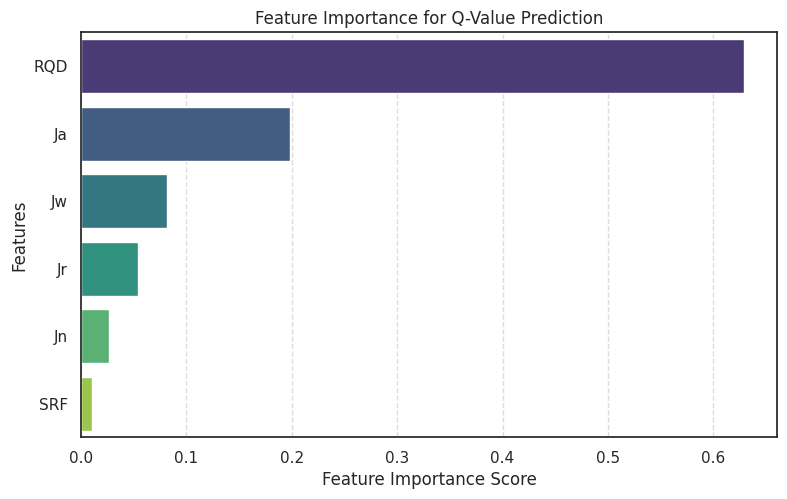


Nonlinear Regression Performance:
R²: 0.8903, MSE: 0.3567

Derived Nonlinear Equation:
Q = 0.6157 * RQD^4.8625 + -0.1584 * Ja^0.4541 + 0.1420 * exp(Jw) + -0.0628


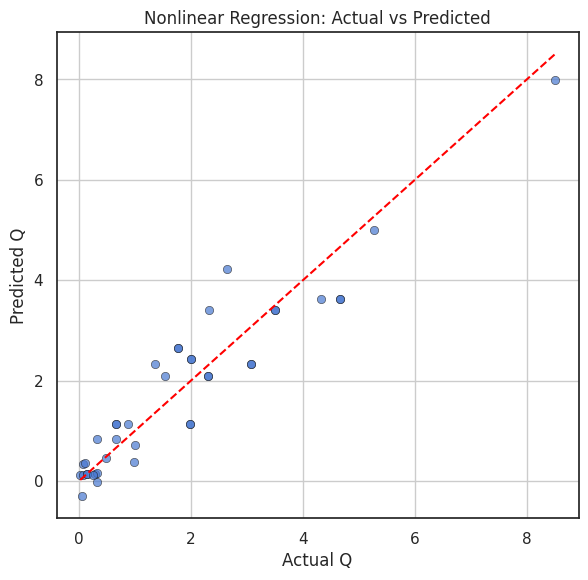

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load Data
X = data[['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF']]
y = data['Q']

# Step 1: Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(3).index.tolist()
print("Top 3 Features Selected:", top_features)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.sort_values(ascending=False),
            y=feature_importances.sort_values(ascending=False).index,
            palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Q-Value Prediction")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

# Step 2: Select the top 3 features
X_selected = data[top_features]

# Step 3: Normalize X and y
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_selected)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 4: Define the Nonlinear Model
def nonlinear_Q(X, a, b, c, d, e, f):
    F1, F2, F3 = X.T  # Ensure correct feature unpacking
    return a * F1**b + c * F2**d + e * np.exp(F3) + f

# Step 5: Curve Fitting
initial_guesses = np.ones(6)  # Initial parameter guesses
params, covariance = curve_fit(nonlinear_Q, X_scaled, y_scaled, p0=initial_guesses, maxfev=20000)

# Step 6: Predictions
y_pred_scaled = nonlinear_Q(X_scaled, *params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 7: Model Evaluation
r2_score_value = r2_score(y, y_pred)
mse_value = mean_squared_error(y, y_pred)

print(f"\nNonlinear Regression Performance:\nR²: {r2_score_value:.4f}, MSE: {mse_value:.4f}")

# Step 8: Derived Nonlinear Equation
equation = f"Q = {params[0]:.4f} * {top_features[0]}^{params[1]:.4f} + {params[2]:.4f} * {top_features[1]}^{params[3]:.4f} + " \
           f"{params[4]:.4f} * exp({top_features[2]}) + {params[5]:.4f}"
print("\nDerived Nonlinear Equation:")
print(equation)

# Step 9: Scatter Plot - Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--")
plt.xlabel("Actual Q")
plt.ylabel("Predicted Q")
plt.title("Nonlinear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [33]:
blind_data

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees
0,20.53,23.14,2.11,8.61,0.65,5.00,0.03,0.08,0.03,0.18,0.06
1,36.72,4.06,1.50,5.91,0.67,5.00,0.12,0.23,0.18,1.27,0.28
2,21.30,22.74,1.96,7.65,0.68,5.00,0.04,0.08,0.03,0.20,0.08
3,26.27,16.71,1.85,7.22,0.67,5.00,0.06,0.09,0.03,0.23,0.09
4,24.47,19.39,1.80,6.69,0.70,5.00,0.06,0.09,0.05,0.20,0.15
...,...,...,...,...,...,...,...,...,...,...,...
495,41.77,10.55,2.11,7.45,0.70,2.27,0.36,0.30,0.31,0.55,0.42
496,34.44,14.26,2.35,9.27,0.76,3.83,0.12,0.10,0.06,0.23,0.44
497,37.30,6.00,1.80,9.14,0.75,3.83,0.22,0.24,0.23,0.49,0.48
498,42.80,13.89,2.33,5.86,0.55,4.42,0.20,0.17,0.08,0.78,0.24


In [34]:
def calculate_Q(row):
    return (row['RQD'] / row['Jn']) * (row['Jr'] / row['Ja']) * (row['Jw'] / row['SRF'])

# Apply the function row-wise
blind_data['Q_emp'] = blind_data.apply(calculate_Q, axis=1)


In [35]:
blind_data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees,Q_emp
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,57.24,8.35,2.42,4.73,0.72,3.15,1.77,1.90,1.86,1.36,1.89,inf
std,15.35,4.25,0.52,1.99,0.18,1.06,1.70,1.60,1.71,0.99,1.54,NaN
min,10.31,0.00,1.27,0.93,0.21,0.69,0.00,0.07,0.00,0.06,0.06,0.01
25%,44.35,5.87,2.04,3.25,0.61,2.41,0.24,0.35,0.32,0.49,0.42,0.31
50%,62.29,7.35,2.40,4.13,0.70,3.00,1.35,1.72,1.49,1.43,1.67,1.36
75%,68.77,9.21,2.74,6.32,0.83,3.78,2.89,2.74,2.84,1.54,2.78,2.69
max,87.09,35.88,4.30,9.58,1.32,6.35,7.00,7.10,8.51,6.82,7.17,inf


In [36]:
# Save blind_data to CSV
#blind_data.to_csv('/content/sample_data/blind_data_cleaned.csv', index=False)

In [43]:
data = pd.read_csv('/content/sample_data/syn_blind_data_cleaned.csv')

In [44]:
data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees,Q_emp
count,482.00,482.00,482.00,482.00,482.00,482.00,482.00,482.00,482.00,482.00,482.00,482.00
mean,56.71,8.51,2.41,4.80,0.72,3.20,1.68,1.80,1.75,1.31,1.80,1.69
std,15.25,4.22,0.51,1.96,0.17,1.04,1.63,1.49,1.57,0.93,1.44,1.67
min,10.31,0.92,1.27,1.54,0.21,0.78,0.00,0.07,0.00,0.06,0.06,0.01
25%,43.98,5.97,2.04,3.31,0.61,2.44,0.23,0.34,0.31,0.49,0.40,0.30
50%,62.03,7.44,2.39,4.19,0.70,3.05,1.17,1.67,1.47,1.43,1.64,1.28
75%,68.09,9.34,2.73,6.36,0.83,3.79,2.78,2.71,2.77,1.54,2.70,2.46
max,81.26,35.88,4.30,9.58,1.32,6.35,7.00,7.10,8.51,4.67,6.26,8.58


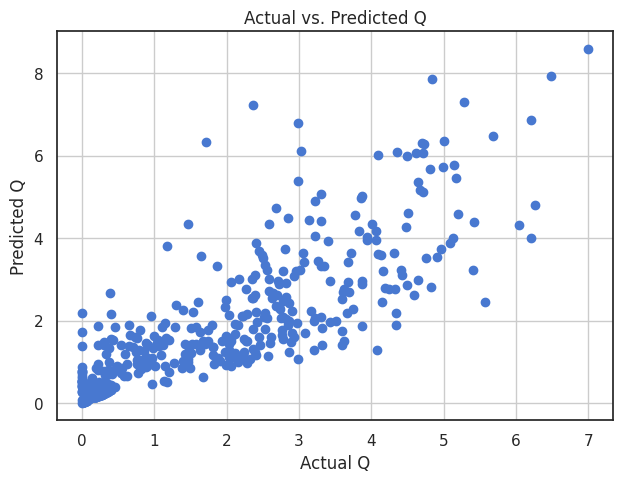

In [45]:
plt.scatter(data['Q'], data['Q_emp'])
plt.xlabel('Actual Q')
plt.ylabel('Predicted Q')
plt.title('Actual vs. Predicted Q')
plt.grid(True)

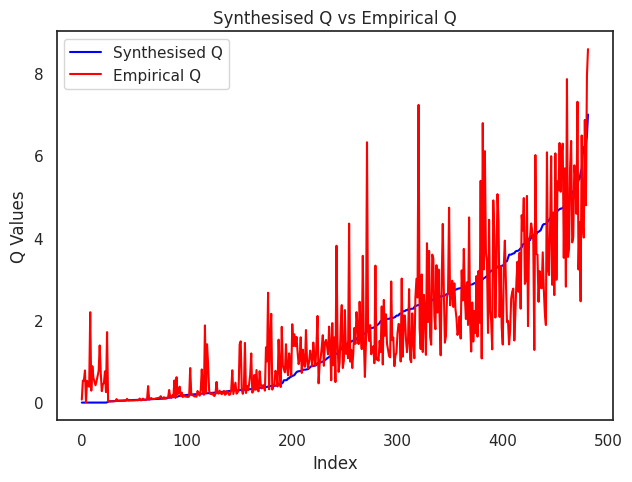

In [46]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted data
plt.plot(data['Q'], color='blue', label='Synthesised Q')  # Synthesized Q (Actual)
plt.plot(data['Q_emp'], color='red', label='Empirical Q')  # Empirical Q (Predicted)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Q Values')
plt.title('Synthesised Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

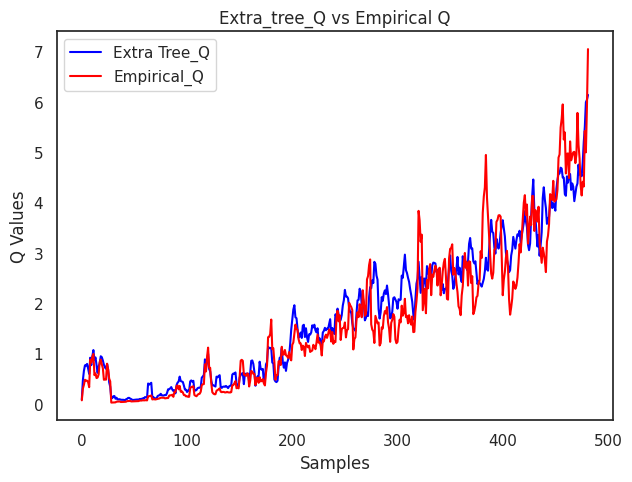

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_Extra_Trees'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='Extra Tree_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and' title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('Extra_tree_Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

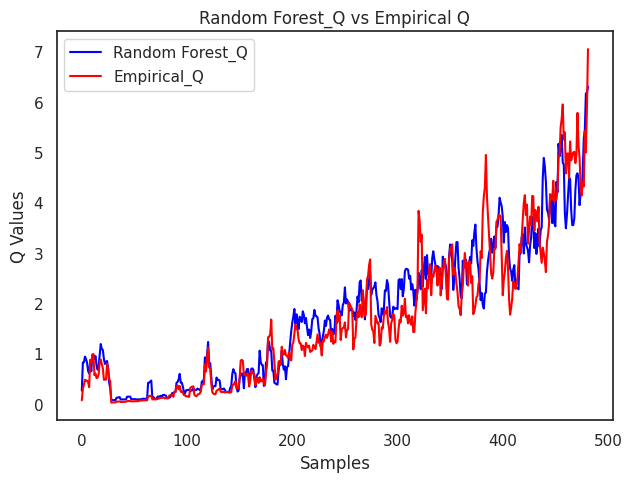

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_Random_Forest'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='Random Forest_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('Random Forest_Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

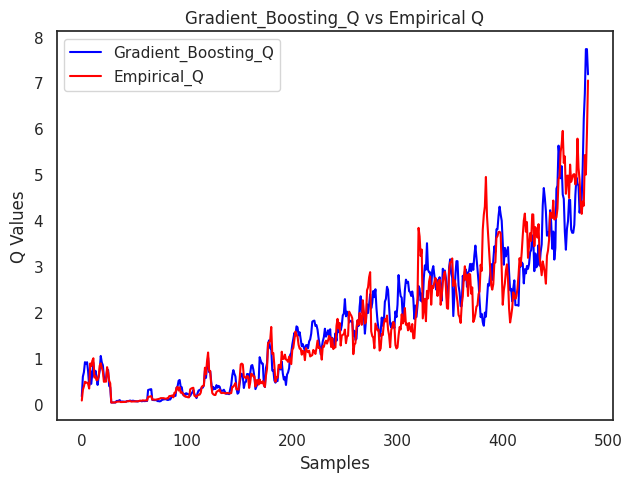

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_Gradient_Boosting'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='Gradient_Boosting_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('Gradient_Boosting_Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

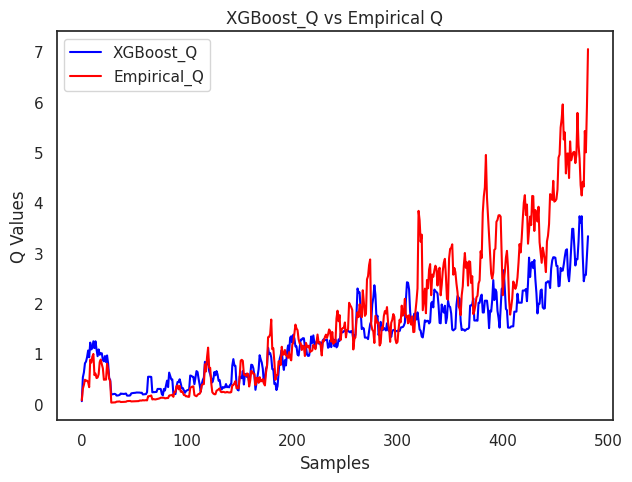

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_XGBoost'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='XGBoost_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('XGBoost_Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# blind data

In [52]:
data = pd.read_excel('/content/sample_data/jeetu Q T9 &T10.xlsx')

In [53]:
columns = ['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF', 'Q']
data = data[columns]

In [54]:
data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,22.50,9.54,2.96,4.67,0.78,3.65,0.35
std,18.99,2.95,0.20,1.71,0.26,1.47,0.29
min,10.00,1.00,2.00,2.00,0.33,2.50,0.07
25%,10.00,9.00,3.00,3.00,0.66,2.50,0.16
50%,10.00,9.00,3.00,6.00,0.83,2.50,0.25
75%,36.75,12.00,3.00,6.00,1.00,5.00,0.35
max,66.00,12.00,3.00,8.00,1.00,7.50,1.00


In [55]:
def calculate_Q(row):
    return (row['RQD'] / row['Jn']) * (row['Jr'] / row['Ja']) * (row['Jw'] / row['SRF'])

# Apply the function row-wise
data['Q_emp'] = data.apply(calculate_Q, axis=1)

In [56]:
# Ensure well2 exists
# Assuming X_well2 is your input DataFrame for prediction
X_well2 = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]

# Initialize a dictionary to store predictions
predictions = {}

# Apply the same Yeo-Johnson transformation used for training
transformer = PowerTransformer(method='yeo-johnson') # Initialize the transformer
X_well2_transformed = transformer.fit_transform(X_well2) # Transform X_well2

# Loop through all trained models and predict
for name, model in models.items():
    print(f"Predicting with {name}...")

    # Predict on the transformed blind dataset
    y_pred_well2 = model.predict(X_well2_transformed)

    # Inverse transform if necessary (adjust based on your y transformation)
    y_pred_well2_inv = y_pred_well2  # Use inverse_transform() if needed

    # Clip negative predictions if necessary
    y_pred_well2_inv = np.maximum(y_pred_well2_inv, 0)

    # Store predictions in the DataFrame
    data[f'Q_predicted_{name.replace(" ", "_")}'] = y_pred_well2_inv

# Display the first few rows with predictions
data.describe()

Predicting with Random Forest...
Predicting with Gradient Boosting...
Predicting with XGBoost...
Predicting with Extra Trees...


,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_emp,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,22.50,9.54,2.96,4.67,0.78,3.65,0.35,0.47,1.83,2.13,1.01,1.95
std,18.99,2.95,0.20,1.71,0.26,1.47,0.29,0.80,0.94,1.17,0.41,0.79
min,10.00,1.00,2.00,2.00,0.33,2.50,0.07,0.07,0.48,0.58,0.30,0.42
25%,10.00,9.00,3.00,3.00,0.66,2.50,0.16,0.16,1.19,1.28,0.76,1.35
50%,10.00,9.00,3.00,6.00,0.83,2.50,0.25,0.25,1.53,1.82,1.09,2.16
75%,36.75,12.00,3.00,6.00,1.00,5.00,0.35,0.35,2.33,3.03,1.36,2.46
max,66.00,12.00,3.00,8.00,1.00,7.50,1.00,4.00,4.49,5.51,1.47,3.57


In [62]:
#data.to_excel('output.xlsx', index=False)
data = pd.read_excel('/content/sample_data/Q_output_validation.xlsx') #

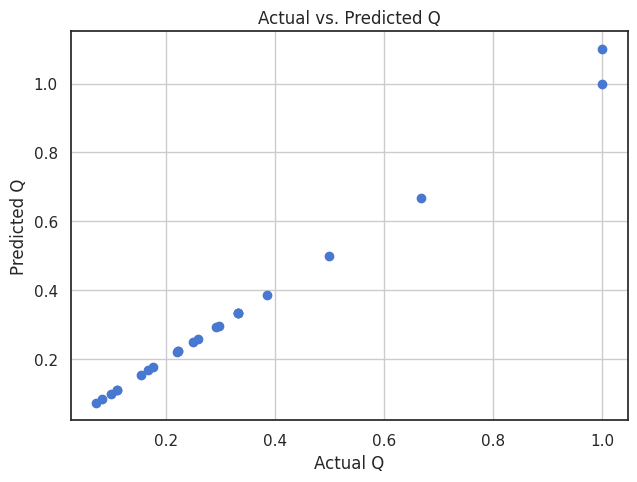

In [63]:
plt.scatter(data['Q'], data['Q_emp'])
plt.xlabel('Actual Q')
plt.ylabel('Predicted Q')
plt.title('Actual vs. Predicted Q')
plt.grid(True)

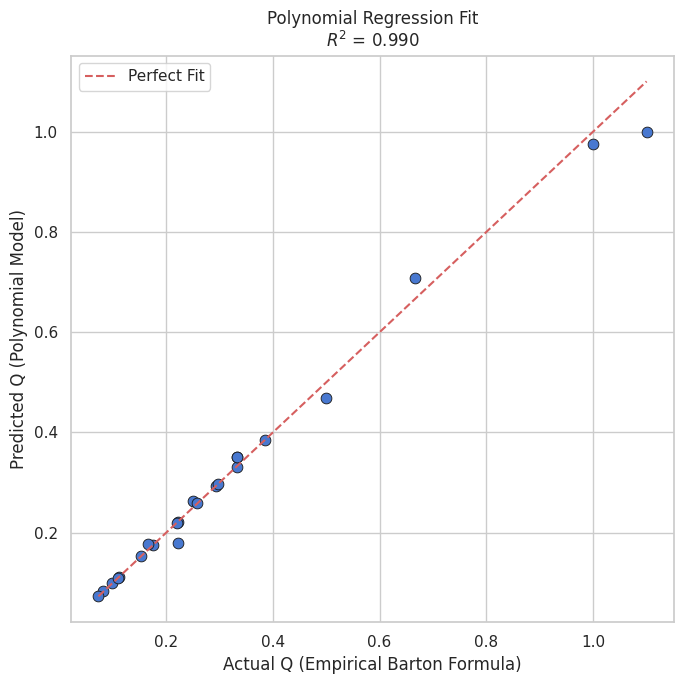


Polynomial Regression Equation:
Q = 1.11 + (-0.00 * RQD) + (-0.02 * Jn) + (0.00 * Jr) + (-0.03 * Ja) + (0.09 * Jw) + (0.01 * SRF) + (-0.00 * RQD^2) + (-0.00 * RQD Jn) + (0.02 * RQD Jr) + (-0.01 * RQD Ja) + (0.01 * RQD Jw) + (-0.00 * RQD SRF) + (0.01 * Jn^2) + (-0.06 * Jn Jr) + (0.01 * Jn Ja) + (-0.02 * Jn Jw) + (-0.01 * Jn SRF) + (0.00 * Jr^2) + (-0.07 * Jr Ja) + (0.28 * Jr Jw) + (0.02 * Jr SRF) + (0.02 * Ja^2) + (-0.06 * Ja Jw) + (0.02 * Ja SRF) + (-0.06 * Jw^2) + (-0.06 * Jw SRF) + (-0.01 * SRF^2)


In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Step 2: Features and target for polynomial model
features = ['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']
X = data[features]
y = data['Q']  # using empirical Q as actual target

# Step 3: Polynomial regression model (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict using polynomial model
Q_pred = model.predict(X_poly)
data['Q_pred'] = Q_pred
data['Q_actual'] = data['Q_emp']

# Step 5: R² score between empirical and predicted
r2 = r2_score(data['Q_actual'], data['Q_pred'])

# Step 6: Scatter plot (Linear Scale or Log Scale as needed)
plt.figure(figsize=(7, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=data, x='Q_actual', y='Q_pred', edgecolor='k', s=60)
plt.plot([data['Q_actual'].min(), data['Q_actual'].max()],
         [data['Q_actual'].min(), data['Q_actual'].max()],
         'r--', label='Perfect Fit')

plt.xlabel('Actual Q (Empirical Barton Formula)')
plt.ylabel('Predicted Q (Polynomial Model)')
plt.title(f'Polynomial Regression Fit\n$R^2$ = {r2:.3f}')
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Optional – Display polynomial equation
coefficients = model.coef_
intercept = model.intercept_
feature_names = poly.get_feature_names_out(features)

equation = f"Q = {intercept:.2f}"
for coef, name in zip(coefficients, feature_names):
    equation += f" + ({coef:.2f} * {name})"

print("\nPolynomial Regression Equation:")
print(equation)

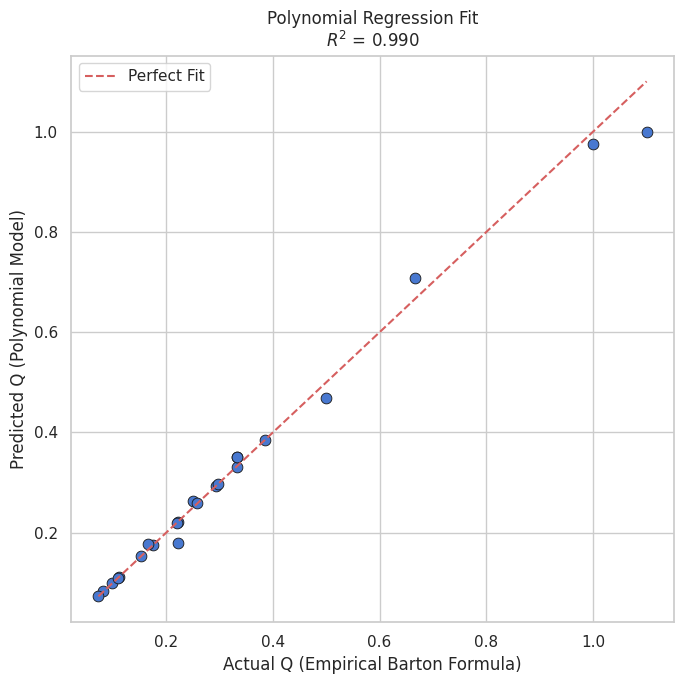


✅ Simplified Polynomial Regression Equation:
Q = 1.11 + 0.09 * Jw + -0.06 * Jn Jr + -0.07 * Jr Ja + 0.28 * Jr Jw + -0.06 * Ja Jw + -0.06 * Jw^2 + -0.06 * Jw SRF

✅ Data saved to Excel: 'Q_polynomial_model_output.xlsx'


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Step 2: Features and target for polynomial model
features = ['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']
X = data[features]
y = data['Q']  # using empirical Q as actual target

# Step 3: Polynomial regression model (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict using polynomial model
Q_pred = model.predict(X_poly)
data['Q_pred'] = Q_pred
data['Q_actual'] = data['Q_emp']

# Step 5: Scatter plot
plt.figure(figsize=(7, 7))
sns.set_style("whitegrid")

sns.scatterplot(data=data, x='Q_actual', y='Q_pred', edgecolor='k', s=60)
plt.plot([data['Q_actual'].min(), data['Q_actual'].max()],
         [data['Q_actual'].min(), data['Q_actual'].max()],
         'r--', label='Perfect Fit')

plt.xlabel('Actual Q (Empirical Barton Formula)')
plt.ylabel('Predicted Q (Polynomial Model)')
plt.title(f'Polynomial Regression Fit\n$R^2$ = {r2:.3f}')
plt.legend()
plt.tight_layout()
plt.show()

# Step 6: Simplify and display polynomial equation
coefficients = model.coef_
intercept = model.intercept_
feature_names = poly.get_feature_names_out(features)

threshold = 0.03  # Threshold to filter small coefficients
equation_terms = [f"{intercept:.2f}"]

for coef, name in zip(coefficients, feature_names):
    if abs(coef) >= threshold:
        equation_terms.append(f"{coef:.2f} * {name}")

short_equation = "Q = " + " + ".join(equation_terms)

print("\n✅ Simplified Polynomial Regression Equation:")
print(short_equation)

# Step 7: Export DataFrame to Excel
output_file = "Q_polynomial_model_output.xlsx"
data.to_excel(output_file, index=False)
print(f"\n✅ Data saved to Excel: '{output_file}'")

In [ ]:
data